In [23]:
import numpy as np
def merge_batch_files(batch_files, output_npz, param_names):
    """合并所有批次文件"""
    all_hitsE = []
    all_hitsM = []
    all_params = []

    for batch_file in batch_files:
        data = np.load(batch_file, allow_pickle=True)
        all_hitsE.extend(data["hitsE"])
        all_hitsM.extend(data["hitsM"])
        all_params.extend(data["params"])

    np.savez_compressed(output_npz,
                        hitsE=np.array(all_hitsE, dtype=object),
                        hitsM=np.array(all_hitsM, dtype=object),
                        params=np.array(all_params, dtype=object),
                        param_names=param_names)
    print(f"All data saved to: {output_npz}")

def sample_data(file_path, output_npz, batch_size=(-1, 1000, 1000)):
    """
    从合并后的 npz 文件中随机抽样指定数量的 monopole、gamma、proton 事件。
    
    参数：
        file_path: str
            输入 npz 文件路径（由 merge_batch_files 生成的最终文件）
        output_npz: str
            输出抽样 npz 文件路径
        batch_size: tuple
            (n_monopole, n_gamma, n_proton)
            若为 -1 则表示使用该类的全部样本
    """
    data = np.load(file_path, allow_pickle=True)
    hitsE_all, hitsM_all, params_all, param_names = (
        data["hitsE"], data["hitsM"], data["params"], data["param_names"]
    )

    params_all = np.array(params_all, dtype=object)
    labels = np.array([p[0] for p in params_all])  # label 是 params 的第一个元素

    # 定义类别映射
    label_map = {
        43: ("monopole", batch_size[0]),
        1:  ("gamma", batch_size[1]),
        14: ("proton", batch_size[2])
    }

    selected_hitsE, selected_hitsM, selected_params = [], [], []

    for label_value, (label_name, n_sample) in label_map.items():
        idx = np.where(labels == label_value)[0]
        total = len(idx)
        if total == 0:
            print(f"[WARN] No samples found for label={label_value} ({label_name})")
            continue

        if n_sample == -1 or n_sample > total:
            n_sample = total

        chosen = np.random.choice(idx, size=n_sample, replace=False)
        print(f"[INFO] Selected {n_sample}/{total} {label_name} events")

        selected_hitsE.extend(hitsE_all[chosen])
        selected_hitsM.extend(hitsM_all[chosen])
        selected_params.extend(params_all[chosen])

    np.savez_compressed(
        output_npz,
        hitsE=np.array(selected_hitsE, dtype=object),
        hitsM=np.array(selected_hitsM, dtype=object),
        params=np.array(selected_params, dtype=object),
        param_names=param_names
    )

    print(f"[DONE] Saved sampled dataset to: {output_npz}")

# npzfile_list=[
#                 "/home/zhonghua/data/Dataset_Filted/Experiment/2022/combined_20220101_to_20220524_dataset.npz",
#                 "/home/zhonghua/data/Dataset_Filted/Experiment/2022/combined_20220525_to_20220531_dataset.npz",
#                 "/home/zhonghua/data/Dataset_Filted/Experiment/2022/combined_20220601_to_20220704_dataset.npz",
#                 "/home/zhonghua/data/Dataset_Filted/Experiment/2022/combined_20220705_to_20221231_dataset.npz",
#                 ]
# param_names=["label","weight",
#                 "R_ue", "R_mean", "Eage",
#                 "recE", "rec_x", "rec_y", "rec_theta", "rec_phi", 
#                 "trueE", "NuW2", "NpE3", "NuM1", "core_x","core_y","theta"]

# allnpzfile="/home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels.npz"
# merge_batch_files(npzfile_list,allnpzfile , param_names)

# /home/zhonghua/data/Dataset_Filted/filted_Monopole_1e10_merged_1000_70_new_dataset.npz

npzfile_list=[
             "/home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_all_combined_filted_1e10_V03_12_16_dataset.npz",
             "/home/zhonghua/data/Dataset_Filted/filted_Monopole_1e10_merged_1000_70_new_dataset.npz"
                ]
param_names=["label","weight",
                "R_ue", "R_mean", "Eage", "trueE", "recE", "rec_x", "rec_y", "rec_theta", "rec_phi"]

allnpzfile="/home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_Monoople_all_combined_filted_1e10_V03_dataset.npz"
merge_batch_files(npzfile_list,allnpzfile , param_names)


All data saved to: /home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_Monoople_all_combined_filted_1e10_V03_dataset.npz


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# data= np.load(allnpzfile, allow_pickle=True)
data= np.load("/home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels_optimized.npz", allow_pickle=True)
param_names=data["param_names"]
params=data["params"]
print(data["param_names"])
data_df = pd.DataFrame(params, columns=param_names)
rec_x = np.asarray(data_df["rec_x"], dtype=np.float64)
rec_y = np.asarray(data_df["rec_y"], dtype=np.float64)
r = np.sqrt(rec_x**2 + rec_y**2)
data_df["rec_r"] = r

plt.hist(data_df["rec_r"], bins=100,)
plt.show()
plt.hist(data_df["Eage"], bins=100,)
plt.show()
plt.hist(data_df[data_df["R_mean"]>20]["R_mean"], bins=100,)
plt.show()
plt.hist(data_df["R_ue"], bins=100, range=(-10,2))
plt.show()
plt.hist(data_df["rec_theta"], bins=100,)
plt.show()



In [ ]:
import numpy as np

# r_low=320
# r_high=420
# theta_low=10 / 180.0 * np.pi
# theta_high=30 / 180.0 * np.pi

r_low=300
r_high=500
theta_low=0
theta_high=50 / 180.0 * np.pi

Rmean_low=25.0
Rmean_high=45.0
Eage_low=0.8
Eage_high=1.2
R_ue_high=-5.0
log10TeV_low=1.7969200611114502
log10TeV_high=2.1131057739257812

def filter_dataset_optimized(npz_file, output_file, mc=True):
    # param_names=["label","weight",
    #                 "R_ue", "R_mean", "Eage",
    #                 "recE", "rec_x", "rec_y", "rec_theta", "rec_phi", 
    #                 "trueE", "NuW2", "NpE3", "NuM1", "core_x","core_y","theta"]
    data = np.load(npz_file, allow_pickle=True)
    params = data["params"]
    params_df = pd.DataFrame(params, columns=data["param_names"])
    
    initial_count = len(params)
    current_mask = np.ones(initial_count, dtype=bool)
    
   
    recE= params_df["recE"].values
    R_ue =  params_df["R_ue"].values
    R_mean = params_df["R_mean"].values
    Eage = params_df["Eage"].values
    rec_x = params_df["rec_x"].values
    rec_y = params_df["rec_y"].values
    
    # 向量化计算 r
    r = np.sqrt(rec_x**2 + rec_y**2)

    # --------------------------------------------------
    # 顺序筛选与打印比例
    # --------------------------------------------------
    print(f"--- 原始数据量: {initial_count} ---")
    
    # 1. 筛选 r (r_low < r < r_high)
    r_mask = (r > r_low) & (r < r_high)
    n_last = current_mask.sum()
    current_mask = current_mask & r_mask
    n_after = current_mask.sum()
    print(f"1. Cut r: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # 2. 筛选 theta (theta_low < theta < theta_high)
    theta_mask = (params[:, 8] > theta_low) & (params[:, 8] < theta_high)
    n_last = current_mask.sum()
    current_mask = current_mask & theta_mask
    n_after = current_mask.sum()
    print(f"2. Cut theta: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # 0. 筛选 log10TeV (log10TeV_low < recE < log10TeV_high)
    log10TeV_mask = (recE > log10TeV_low) & (recE < log10TeV_high)
    n_last = current_mask.sum()
    current_mask = current_mask & log10TeV_mask
    n_after = current_mask.sum()
    print(f"0. Cut log10TeV: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")
    # 2. 筛选 Eage (Eage_low < Eage < Eage_high)
    Eage_mask = (Eage > Eage_low) & (Eage < Eage_high)
    n_last = current_mask.sum()
    current_mask = current_mask & Eage_mask
    n_after = current_mask.sum()
    print(f"3. Cut Eage: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # 3. 筛选 R_mean (Rmean_low < R_mean < Rmean_high)
    Rmean_mask = (R_mean > Rmean_low) & (R_mean < Rmean_high)
    n_last = current_mask.sum()
    current_mask = current_mask & Rmean_mask
    n_after = current_mask.sum()
    print(f"4. Cut R_mean: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # if not mc:
    #     # 4. 筛选 R_ue (R_ue < R_ue_high)
    #     R_ue_mask = (R_ue < R_ue_high)
    #     n_last = current_mask.sum()
    #     current_mask = current_mask & R_ue_mask
    #     n_after = current_mask.sum()
    #     print(f"5. Cut R_ue: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # --------------------------------------------------
    # 数据保存 (保持与原函数一致)
    # --------------------------------------------------
    
    # 打印最终统计信息
    final_count = current_mask.sum()
    print(f"\n--- 筛选结果 ---")
    print(f"原始数据量: {initial_count}")
    print(f"筛选后数据量: {final_count}")
    print(f"总通过比例: {final_count/initial_count:.2%}")

    filtered_data = {}
    keys = data.files
    
    for key in keys:
        if key == "param_names":
            filtered_data[key] = data[key]
        else:
            # 使用布尔掩码直接筛选数组，这是最快的方法
            filtered_data[key] = data[key][current_mask]

    np.savez(output_file, **filtered_data)
    print(f"筛选后的数据已保存到: {output_file}")
    print("--------------------------------------------------")
    # 关闭文件
    data.close()

def filter_dataset_optimized_old(npz_file, output_file, mc=True):
    # param_names=["label","weight",
    #             "R_ue", "R_mean", "Eage", "trueE", "recE", "rec_x", "rec_y", "rec_theta", "rec_phi"]
    data = np.load(npz_file, allow_pickle=True)
    params = data["params"]
    params_df = pd.DataFrame(params, columns=data["param_names"])
    
    initial_count = len(params)
    current_mask = np.ones(initial_count, dtype=bool)
    
   
    recE= params_df["recE"].values
    R_ue =  params_df["R_ue"].values
    R_mean = params_df["R_mean"].values
    Eage = params_df["Eage"].values
    rec_x = params_df["rec_x"].values
    rec_y = params_df["rec_y"].values
    
    # 向量化计算 r
    r = np.sqrt(rec_x**2 + rec_y**2)

    # --------------------------------------------------
    # 顺序筛选与打印比例
    # --------------------------------------------------
    print(f"--- 原始数据量: {initial_count} ---")
    
    # 1. 筛选 r (r_low < r < r_high)
    r_mask = (r > r_low) & (r < r_high)
    n_last = current_mask.sum()
    current_mask = current_mask & r_mask
    n_after = current_mask.sum()
    print(f"1. Cut r: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # 2. 筛选 theta (theta_low < theta < theta_high)
    theta_mask = (params[:, 9] > theta_low) & (params[:, 9] < theta_high)
    n_last = current_mask.sum()
    current_mask = current_mask & theta_mask
    n_after = current_mask.sum()
    print(f"2. Cut theta: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # 0. 筛选 log10TeV (log10TeV_low < recE < log10TeV_high)
    log10TeV_mask = (recE > log10TeV_low) & (recE < log10TeV_high)
    n_last = current_mask.sum()
    current_mask = current_mask & log10TeV_mask
    n_after = current_mask.sum()
    print(f"0. Cut log10TeV: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # 2. 筛选 Eage (Eage_low < Eage < Eage_high)
    Eage_mask = (Eage > Eage_low) & (Eage < Eage_high)
    n_last = current_mask.sum()
    current_mask = current_mask & Eage_mask
    n_after = current_mask.sum()
    print(f"3. Cut Eage: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # 3. 筛选 R_mean (Rmean_low < R_mean < Rmean_high)
    Rmean_mask = (R_mean > Rmean_low) & (R_mean < Rmean_high)
    n_last = current_mask.sum()
    current_mask = current_mask & Rmean_mask
    n_after = current_mask.sum()
    print(f"4. Cut R_mean: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # if not mc:
    #     # 4. 筛选 R_ue (R_ue < R_ue_high)
    #     R_ue_mask = (R_ue < R_ue_high)
    #     n_last = current_mask.sum()
    #     current_mask = current_mask & R_ue_mask
    #     n_after = current_mask.sum()
    #     print(f"5. Cut R_ue: {n_after} / {n_last} (Left Ratio: {n_after/n_last:.2%})")

    # --------------------------------------------------
    # 数据保存 (保持与原函数一致)
    # --------------------------------------------------
    
    # 打印最终统计信息
    final_count = current_mask.sum()
    print(f"\n--- 筛选结果 ---")
    print(f"原始数据量: {initial_count}")
    print(f"筛选后数据量: {final_count}")
    print(f"总通过比例: {final_count/initial_count:.2%}")

    filtered_data = {}
    keys = data.files
    
    for key in keys:
        if key == "param_names":
            filtered_data[key] = data[key]
        else:
            # 使用布尔掩码直接筛选数组，这是最快的方法
            filtered_data[key] = data[key][current_mask]

    np.savez(output_file, **filtered_data)
    print(f"筛选后的数据已保存到: {output_file}")
    
    # 关闭文件
    data.close()

npz_file = "/home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels.npz"
output_file = "/home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels_loose.npz"
output_file = "/home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels_loose_300_500.npz"
filter_dataset_optimized(npz_file, output_file, mc=False)

# npz_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/0818_filted_EF_Proton_4e13_1e15_dataset.npz"
# output_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/0818_filted_EF_Proton_4e13_1e15_dataset_loose.npz"
# filter_dataset_optimized(npz_file, output_file)

# npz_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/0818_filted_QF_Proton_4e13_1e15_dataset.npz"
# output_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/0818_filted_QF_Proton_4e13_1e15_dataset_loose.npz"
# filter_dataset_optimized(npz_file, output_file)

# npz_file  = "/home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_all_combined_filted_1e10_V03_12_16_dataset.npz"
# output_file = "/home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_all_combined_filted_1e10_V03_12_16_dataset_loose.npz"
# filter_dataset_optimized_old(npz_file, output_file)

# npz_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/Proton_1000_70_1e10_V03_dataset.npz"
# output_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/Proton_1000_70_1e10_V03_dataset_loose.npz"
# output_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/Proton_1000_70_1e10_V03_dataset_loose_300_500.npz"
# filter_dataset_optimized(npz_file, output_file)

# npz_file  = "/home/zhonghua/data/Dataset_Filted/filted_Monopole_1e10_merged_1000_70_new_dataset.npz"
# output_file = "/home/zhonghua/data/Dataset_Filted/filted_Monopole_1e10_merged_1000_70_new_dataset_loose.npz"
# output_file = "/home/zhonghua/data/Dataset_Filted/filted_Monopole_1e10_merged_1000_70_new_dataset_loose_300_500.npz"
# filter_dataset_optimized(npz_file, output_file)


--- 原始数据量: 109185 ---
1. Cut r: 58778 / 109185 (Left Ratio: 53.83%)
2. Cut theta: 58778 / 58778 (Left Ratio: 100.00%)
0. Cut log10TeV: 58773 / 58778 (Left Ratio: 99.99%)
3. Cut Eage: 47187 / 58773 (Left Ratio: 80.29%)
4. Cut R_mean: 25213 / 47187 (Left Ratio: 53.43%)

--- 筛选结果 ---
原始数据量: 109185
筛选后数据量: 25213
总通过比例: 23.09%
筛选后的数据已保存到: /home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels_loose_300_500.npz
--------------------------------------------------


 (29.50*90.81-29.41*95.28)/(29.41*95.28)

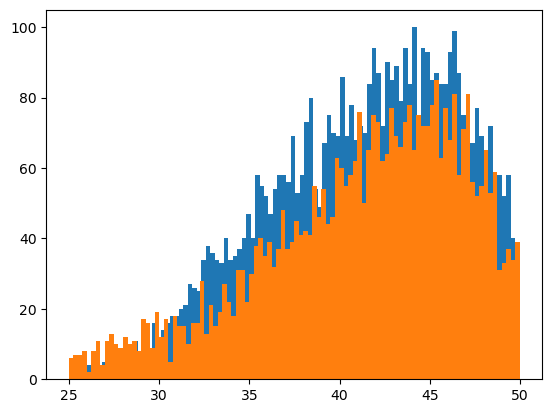

In [79]:
npz_file  = "/home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_all_combined_filted_1e10_V03_12_16_dataset_loose.npz"
pr_data= np.load(npz_file, allow_pickle=True)
param_names=pr_data["param_names"]
params=pr_data["params"]
df= pd.DataFrame(params, columns=param_names)

npz_file  = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/0818_filted_QF_Proton_4e13_1e15_dataset_loose.npz"
pr_data= np.load(npz_file, allow_pickle=True)
param_names=pr_data["param_names"]
params=pr_data["params"]
df_mn= pd.DataFrame(params, columns=param_names)
plt.hist(df["R_mean"], bins=100,)
plt.hist(df_mn["R_mean"], bins=100,)
plt.show()


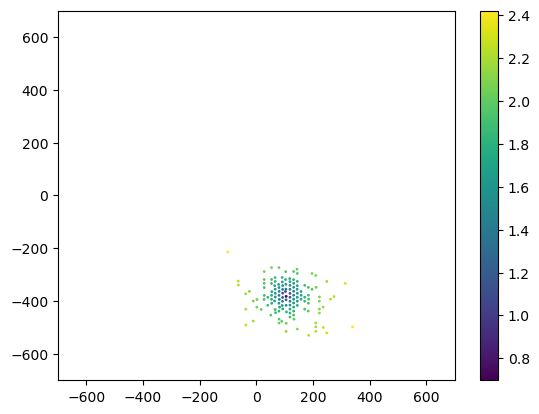

In [53]:
file= "/home/zhonghua/data/Dataset_Filted/filted_Monopole_1e10_merged_1000_70_new_dataset_loose.npz"
data= np.load(file, allow_pickle=True)
params=data["params"]
param_names=data["param_names"]
hitsE=data["hitsE"]
hitsM=data["hitsM"]

n=2
plt.scatter(hitsE[n][:,0], hitsE[n][:,1],c=np.log10(hitsE[n][:,2]), cmap='viridis',s=1)
plt.colorbar()
plt.xlim(-700,700)
plt.ylim(-700,700)
plt.show()


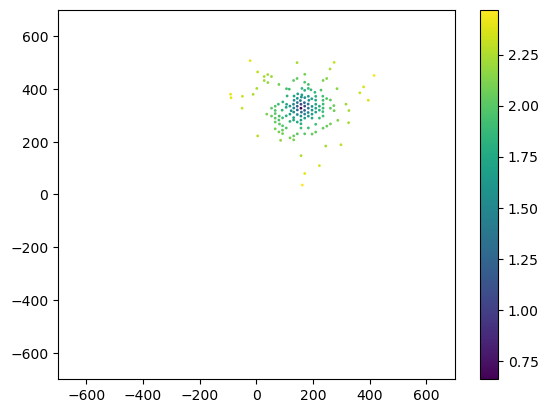

In [ ]:
csv_file = "/home/zhonghua/Filt_Event/model_validation/Transformer/1e10_QG_based_loose_baseline/model_comparison_output/EF_Proton_predictions.csv"
df = pd.read_csv(csv_file)
df_check = df[df['model_score']>0.9]
df_check_index = df_check.index.tolist()
npz_file = "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/0818_filted_EF_Proton_4e13_1e15_dataset_loose.npz"
data= np.load(npz_file, allow_pickle=True)
params=data["params"]
param_names=data["param_names"]
hitsE=data["hitsE"]
hitsM=data["hitsM"]
df_params= pd.DataFrame(params, columns=param_names)
n=df_check_index[100]
plt.scatter(hitsE[n][:,0], hitsE[n][:,1],c=np.log10(hitsE[n][:,2]), cmap='viridis',s=1)
plt.colorbar()
plt.xlim(-700,700)
plt.ylim(-700,700)
plt.show()


In [ ]:
file= "/home/zhonghua/data/Dataset_Filted/filted_Monopole_1e10_merged_1000_70_new_dataset_loose.npz"
sig_data= np.load(file, allow_pickle=True)
sig_df = pd.DataFrame(sig_data["params"], columns=sig_data["param_names"])

npz_file  = "/home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_all_combined_filted_1e10_V03_12_16_dataset_loose.npz"
pr_data= np.load(npz_file, allow_pickle=True)
pr_df = pd.DataFrame(pr_data["params"], columns=pr_data["param_names"])
# 'R_mean', 'Eage', 'recE', 'rec_theta', 'rec_phi',

EF_file= "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/0818_filted_EF_Proton_4e13_1e15_dataset_loose.npz"
QF_file= "/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/0818_filted_QF_Proton_4e13_1e15_dataset_loose.npz"
exp_2022_file="/home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels_loose.npz"


Index(['label', 'weight', 'R_ue', 'R_mean', 'Eage', 'recE', 'rec_x', 'rec_y',
       'rec_theta', 'rec_phi', 'trueE', 'NuW2', 'NpE3', 'NuM1', 'core_x',
       'core_y', 'theta'],
      dtype='object')


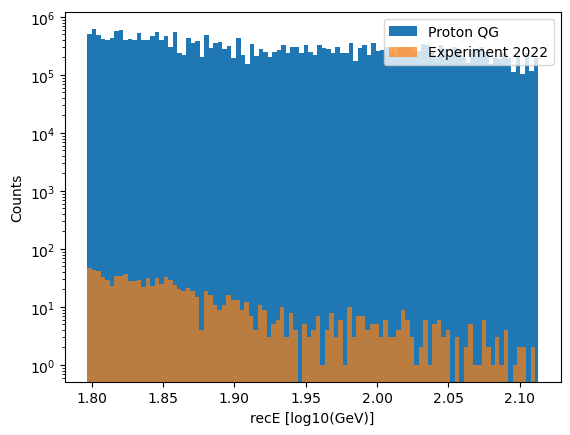

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def give_weight(df):
    import uproot
    rootfile = "/home/zhonghua/data/exposure.root"
    with uproot.open(rootfile) as f:
        hWeight = f["hWeight"]
        edges_E = hWeight.axes[0].edges()  # Energy bin edges
        edges_Zen = hWeight.axes[1].edges()  # Zenith bin edges
        weights_2d = hWeight.values()

    def add_weights(trueE, rec_zenith, weights_2d):
        trueE=np.log10(trueE/1e3)
        rec_zenith=180/np.pi*rec_zenith
        bin_idx_E = np.digitize(trueE, edges_E) - 1
        bin_idx_Zen = np.digitize(rec_zenith, edges_Zen) - 1
        return weights_2d[bin_idx_E, bin_idx_Zen]/10*345
    trueE=np.asarray(df['trueE'].values, dtype=np.float64)
    rec_zenith=np.asarray(df['rec_theta'].values, dtype=np.float64)
    df['weight'] = add_weights(trueE, rec_zenith, weights_2d)
    return df


def get_df(file, weighted=True):
    data= np.load(file, allow_pickle=True)
    param_names=data["param_names"]
    params=data["params"]
    df= pd.DataFrame(params, columns=param_names)
    if weighted:
        df= give_weight(df)
    return df
exp_2022_file="/home/zhonghua/data/Dataset_Filted/Experiment/2022/all_combined_2022_dataset_1e10_for_diffmodels_loose.npz"
exp_2022_df=get_df(exp_2022_file, weighted=False)
pr_file= "/home/zhonghua/data/Dataset_Filted/1e10_V03/Proton_all_combined_filted_1e10_V03_12_16_dataset_loose.npz"
pr_df=get_df(pr_file)
plt.hist(pr_df['recE'], bins=100, weights=pr_df['weight'], label='Proton QG', )
plt.hist(exp_2022_df['recE'], bins=100, label='Experiment 2022', alpha=0.7)
plt.yscale('log')
plt.xlabel('recE [log10(GeV)]')
plt.ylabel('Counts')
plt.legend()
plt.show()
